Перевод в систему исчисления и обратно

In [3]:
bin(289)[2:]

'100100001'

In [2]:
hex(289)[2:]

'121'

In [6]:
int('100100001', base=2)

289

In [7]:
int('121', base=16)

289

In [28]:
# вернуть фильм с наименьшей средней оценкой
films = {'Spider-Man: No Way Home': {'imdb': 8.8, 'kinopoisk': 8.3},
         'Don"t Look Up': {'imdb': 7.3, 'kinopoisk': 7.6},
         'Encanto': {'imdb': 7.3, 'kinopoisk': 7.4},
         'The Witcher': {'imdb': 8.2, 'kinopoisk': 7.3},
         'Ghostbusters: Afterlife': {'imdb': 7.3, 'kinopoisk': 8},
         'Harry Potter 20th Anniversary: Return to Hogwarts': {'imdb': 8.1, 'kinopoisk': 8.2},
         'Shingeki no Kyojin': {'imdb': 9.0, 'kinopoisk': 8.3},
         'The Matrix': {'imdb': 8.7, 'kinopoisk': 8.5},
         'The Dark Knight': {'imdb': 9.0, 'kinopoisk': 8.5},
         'The Shawshank Redemption': {'imdb': 9.3, 'kinopoisk': 9.1},
         'Avengers: Endgame': {'imdb': 8.4, 'kinopoisk': 7.7}}

import numpy as np
print(min(films.items(), 
          key= lambda x: np.mean(list(x[1].values())))[0])

Encanto


In [31]:
numbers = [1,2,3,45,9]
all([num>=0 for num in numbers])

True

In [34]:
list(enumerate('123', start=1))

[(1, '1'), (2, '2'), (3, '3')]

        Функция zip_longest()
        Как уже известно, функция zip() объединяет элементы различных последовательностей. Особенностью функции является то, что при передаче последовательностей различной длины элементы последовательности большей длины будут отброшены.

        Реализуйте функцию zip_longest(), которая принимает переменное количество позиционных аргументов, каждый из которых является списком, и один необязательный именованный аргумент fill, имеющий значение по умолчанию None.

        Функция должна объединять элементы переданных последовательностей в кортежи, аналогично функции zip(), и возвращать в виде списка, но если последовательности имеют различную длину, недостающие элементы последовательностей меньшей длины должны принимать значение fill.

In [50]:
def zip_longest(*args, fill=None):
    len_of_the_longest = max([len(arg) for arg in args])
    for arg in args:
        if len(arg)< len_of_the_longest:
            arg.extend([fill] * (len_of_the_longest - len(arg))) 

    return list(zip(*args))

print(zip_longest([1, 2, 3, 4, 5], ['a', 'b', 'c'], fill='_'))

data = [[1, 2, 3, 4, 5], ['one', 'two', 'three'], ['I', 'II']]
print(zip_longest(*data))

data = [[1, 2, 3, 4, 5], ['one', 'two', 'three', 'four', 'five'], ['I', 'II', 'III', 'IV', 'V']]
print(zip_longest(*data))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, '_'), (5, '_')]
[(1, 'one', 'I'), (2, 'two', 'II'), (3, 'three', None), (4, None, None), (5, None, None)]
[(1, 'one', 'I'), (2, 'two', 'II'), (3, 'three', 'III'), (4, 'four', 'IV'), (5, 'five', 'V')]


In [37]:
list(zip([1,2,3], [4,5]))

[(1, 4), (2, 5)]

In [43]:
list(zip([1,2], [3,4]))

[(1, 3), (2, 4)]

In [42]:
list(zip((1,2), (3,4)))

[(1, 3), (2, 4)]

In [46]:
list(zip(*[[1,2], [3,4], [5,6], [7,8]]))

[(1, 3, 5, 7), (2, 4, 6, 8)]

        Необычная сортировка 🌶️
        Дана строка, содержащая латинские буквы и цифры. Напишите программу, которая сортирует символы в строке согласно следующим правилам:

        все отсортированные строчные буквы стоят перед заглавными буквами
        все отсортированные заглавные буквы стоят перед цифрами
        все отсортированные нечетные цифры стоят перед отсортированными четными

In [110]:
def strange_sorting(string):
    return sorted(string, 
                  key= lambda x: [x.lower() if x.isupper() else x.upper(), 
                                  int(x)%2 if x.isdigit() else x])
                  #reverse=[False, True])

In [111]:
strange_sorting('Sorting1234')

['1', '2', '3', '4', 'g', 'i', 'n', 'o', 'r', 't', 'S']

In [143]:
def s_s(string):
    numbers, up_let, low_let = [],[],[]
    for chr in string:
        if chr.isdigit(): numbers.append(chr)
        elif chr.isupper(): up_let.append(chr)
        elif chr.islower(): low_let.append(chr)
    
    return ''.join(sorted(low_let) + \
                sorted(up_let) + \
                    sorted(numbers, 
                           key=lambda x: [abs(int(x)%2-1), int(x)]))

print(s_s('Sorting1234'))
print(s_s('n0tEast3rEgg'))
print(s_s('AnHTqir9brdQrgu5g71uhm1FaJ4fAZjbisIDnJVYekRPdGDc29'))

ginortS1324
aggnrsttEE30
abbcddefgghiijkmnnqrrrsuuAADDFGHIJJPQRTVYZ11579924


        Если символ - буква, то возвращается один из двух кортежей: (0, 0, символ) - если символ строчный (0, 1, символ) - если символ заглавный 

        Если же символ цифра, то будут следующие кортежи: (1, 0, символ) - если символ чётная цифра (1, 1, символ) - если символ нечётная цифра. 

        Ну и происходит сравнение этих кортежей. А кортежи сравниваются поэлементно. Сначала нулевые индексы, затем первые, если нулевые совпадают, затем вторые, если первые совпадают. 

        Вот и получается, что сначала идут строчные буквы (кортеж (0, 0, символ)), затем заглавные (кортеж (0, 1, символ)), потом чётные цифры (кортеж (1, 0, символ)), и, наконец, нечётные цифры (кортеж (1, 1, символ)) Вторым элементом кортежа у меня написано 0 или 1 потому, что булевый тип можно привести к этим значениям. True == 1 False == 0

In [145]:
# решение через функцию для ключа сортировки
# сложная сортировка 

def comparator(char):
    if char.isalpha():
        return 0, char.isupper(), char
    digit = int(char)
    return 1, digit % 2 == 0, digit

string = 'AnHTqir9brdQrgu5g71uhm1FaJ4fAZjbisIDnJVYekRPdGDc29'

print(''.join(sorted(string, key=comparator)))

abbcddefgghiijkmnnqrrrsuuAADDFGHIJJPQRTVYZ11579924


In [144]:
# вспомогательный код
sorted([1,2,9,3,4,5], key=lambda x: [abs(x%2-1),x])

[1, 3, 5, 9, 2, 4]

        Функция callable()
        Функция callable() принимает в качестве аргумента некоторый объект и возвращает True, если переданный объект является вызываемым, или False в противном случае.



In [146]:
print(callable(int))
print(callable(list))
print(callable(100))
print(callable([1, 2, 3]))

True
True
False
False


        Функция hasattr()
        Функция hasattr() используется для проверки существования атрибута. Она принимает два аргумента:

        object — объект, в котором нужно проверить существование атрибута
        name — имя проверяемого атрибута
        Функция возвращает True, если object имеет атрибут name, или False в противном случае. 

In [147]:
print(hasattr('stepik', 'isalpha'))
print(hasattr([1, 2, 3], 'sort'))
print(hasattr(13, 'to_str'))

True
True
False


        Функция hash()
        Функция hash() принимает в качестве аргумента некоторый объект и возвращает целое число, представляющее хеш-значение переданного объекта. Большинство неизменяемых встроенных объектов Python являются хешируемыми и имеют хеш-значение. Изменяемые коллекции, такие как списки, множества и словари, не имеют хеш-значений.

        хешируемый = неизменяемый

        Кортежи (тип tuple) хешируемы только при условии, что их элементы являются хешируемыми.

In [148]:
print(hash(899))
print(hash(69.0))
print(hash('timyrik'))
print(hash((1, 2, 3)))
print(hash(False))
print(hash(True))

899
69
1738936442309958510
529344067295497451
0
1


        Функция help()
        Функция help() используется для получения документации по указанному модулю, функции или другому объекту. Она принимает в качестве аргумента либо сам объект, либо строку с именем объекта. Вызов без аргументов запускает интерактивную справочную систему в консоли интерпретатора (для выхода используйте quit)

In [149]:
help(print)
help('sorted')

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



        Функция repr()
        Функция repr() принимает в качестве аргумента некоторый объект и возвращает строку, содержащую формальное (понятное интерпретатору) представление переданного объекта.

In [150]:
from datetime import date

print(repr('stepik'))
print(repr([1, 2, 3, 4]))
print(repr(date(2022, 1, 16)))

'stepik'
[1, 2, 3, 4]
datetime.date(2022, 1, 16)


#### Задача

        Функция hash_as_key()
        Реализуйте функцию hash_as_key(), которая принимает один аргумент:

        objects — список хешируемых объектов
        Функция должна возвращать словарь, ключом в котором является хеш-значение объекта из списка objects, а значением — сам объект. Если хеш-значения некоторых объектов совпадают, их следует объединить в список.

        Примечание 1. Элементы в возвращаемом функцией словаре, а также объекты в списке, имеющие равные хеш-значения, должны располагаться в своем исходном порядке.

In [178]:
def hash_as_key(objects):
    res = {}
    for dic in [{hash(el) : el} for el in data]:
        key = list(dic.keys())[0]
        if  key not in res: res.update(dic)
        else: 
            if isinstance(res[key], list): res[key].append(dic[key])
            else: res[key] = [res[key], dic[key]]
    return res

data = [1, 2, 3, 4, 5, 5]
print(hash_as_key(data))

data = [11, 22, 33, 44, 55, 66, 77, 88, 99, 111]
print(hash_as_key(data))

data = [-1, -2, -3, -4, -5]
print(hash_as_key(data))

data = [5, 5, 5]
print(hash_as_key(data))

{1: 1, 2: 2, 3: 3, 4: 4, 5: [5, 5]}
{11: 11, 22: 22, 33: 33, 44: 44, 55: 55, 66: 66, 77: 77, 88: 88, 99: 99, 111: 111}
{-2: [-1, -2], -3: -3, -4: -4, -5: -5}
{5: [5, 5, 5]}


In [174]:
data = [1, 2, 3, 4, 5, -1, -2, 1, 6, 1]
hash_data = [hash(elem) for elem in data]
hash_data

[1, 2, 3, 4, 5, -2, -2, 1, 6, 1]

In [177]:
hashed_dicts = [{hash(el) : el} for el in data]
print(hashed_dicts)

res = {}
for dic in hashed_dicts:
    key = list(dic.keys())[0]
    if  key not in res:
        res.update(dic)
    else: 
        if isinstance(res[key], list): res[key].append(dic[key])
        else: res[key] = [res[key], dic[key]]
    print(res)
print(res)

[{1: 1}, {2: 2}, {3: 3}, {4: 4}, {5: 5}, {-2: -1}, {-2: -2}, {1: 1}, {6: 6}, {1: 1}]
{1: 1}
{1: 1, 2: 2}
{1: 1, 2: 2, 3: 3}
{1: 1, 2: 2, 3: 3, 4: 4}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, -2: -1}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2]}
{1: [1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2]}
{1: [1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2], 6: 6}
{1: [1, 1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2], 6: 6}
{1: [1, 1, 1], 2: 2, 3: 3, 4: 4, 5: 5, -2: [-1, -2], 6: 6}


In [162]:
a,d = {-2: -1}, {-2: -2}
d[-2] = [a[-2], d[-2]]

d

{-2: [-1, -2]}

        Функция eval()
        Функция eval() выполняет строку-выражение, переданную ей в качестве обязательного аргумента, и возвращает результат выполнения этой строки. Аргумент функции:

        expression — строка-выражение, которую требуется исполнить
        Для выполнения строки-выражения, функция eval() совершает следующие шаги:

        - Парсит (parse) выражение
        - Компилирует (compile) выражение в байт-код
        - Вычисляет (evaluate) значение выражения
        - Возвращает (return) результат вычисления

         не все языковые конструкции являются выражениями (expression). Операторами, которые нельзя использовать в качестве выражений, являются, например, while, for, if, def, import, class, raise и т.д.
         Но Если ключевое слово for используется в списочном выражении, то функция eval() может его вычислить



In [179]:
expression = '7 + 10'

result = eval(expression)

print(type(result))
print(result)

<class 'int'>
17


In [180]:
expression1 = "print('Привет из функции eval()')"
expression2 = "len([1, 1, 1, 1, 1])"

result1 = eval(expression1)
result2 = eval(expression2)

print(result1)
print(result2)

Привет из функции eval()
None
5


In [181]:
expression1 = "print('Привет из функции eval()')"

result1 = eval(expression1)

print(result1)


Привет из функции eval()
None


In [182]:
expression2 = "len([1, 1, 1, 1, 1])"

result2 = eval(expression2)

print(result2)

5


Парсинг объектов

С помощью функции eval() можно парсить объекты, то есть преобразовывать из строки в реальные Python объекты

In [187]:
list_data = eval("['Python', 'C#', 'Java']")
tuple_data = eval('(1, 2, 3, 4, 5)')
dict_data = eval("{1: 'January', 2: 'February'}")

print(type(list_data), len(list_data))
print(type(tuple_data), max(tuple_data))
print(type(dict_data), dict_data[2])

<class 'list'> 3
<class 'tuple'> 5
<class 'dict'> February


        Функция exec()
        Функция exec(), в отличие от eval(), принимает блок кода и выполняет его, возвращая значение None. Аргумент функции:

        code — строка, представляющая собой корректный блок кода

In [188]:
code = '''a = 10
b = 20
print(a + b)'''

exec(code)

30


In [189]:
# функция exec() именно выполняет переданный блок кода и всегда возвращает значение None.

code = '100 + 10*7 - 14'

result = exec(code)

print(result)

None


In [190]:
# Блок кода, передаваемый в качестве аргумента функции exec(), имеет доступ ко всем встроенным функциям Python.

code1 = 'print(sorted([3, 5, 4, 1, 2]))'
code2 = 'print(sum([3, 5, 4, 1, 2]))'
code3 = 'print(len([3, 5, 4, 1, 2]))'

exec(code1)
exec(code2)
exec(code3)

[1, 2, 3, 4, 5]
15
5


In [191]:
# Блок кода, передаваемый в качестве аргумента функции exec(), имеет доступ ко всем локальным и глобальным переменным.

numbers = [1, 2, 3, 4, 5]
info = {'name': 'Timur', 'surname': 'Guev'}

code1 = '''total = 0
for i in numbers:
    total += i
print(total)'''
code2 = 'print(info["name"], info["surname"])'

exec(code1)
exec(code2)

15
Timur Guev


In [193]:
code = """a = 10"""
exec(code)  # вернет None , но код выполнит и объявит переменную
print(a)


10


In [194]:
obj = eval('[7, 4, 3, 1, 9]')

if hasattr(obj, 'sort'):
    obj.sort()
    
print(obj)

[1, 3, 4, 7, 9]


Задача

        Коллекции
        Напишите программу, которая принимает на вход корректный непустой список, корректный непустой кортеж или корректное произвольной длины множество, и выполняет следующее:

        если введен список, выводит его последний элемент
        если введен кортеж, выводит его первый элемент
        если введено множество, выводит количество его элементов

In [200]:
def cond_print(smth):
    collection = eval(smth)
    if isinstance(collection, list):  return print(collection[-1])
    elif isinstance(collection, tuple): return print(collection[0])
    elif isinstance(collection, set):  return print(len(collection))


cond_print(input())

[5, 6]


        Математические выражения
        Напишите программу, которая принимает на вход произвольное количество строк, содержащих корректные математические выражения, и выводит значение наибольшего из них.

        Формат входных данных
        На вход программе подается произвольное количество строк, каждое из которых содержит корректное математическое выражение.

In [ ]:
from sys import stdin
math_expression = [line.strip() for line in stdin.readlines()]

print(max([eval(expr) for expr in math_expression ]))

        Минимум и максимум
        Напишите программу, которая определяет минимальное и максимальное значения функции на отрезке в целых точках.

        Формат входных данных
        На вход программе в первой строке подается корректная функция 
        f(x), в следующей строке вводятся два целых числа 
        a и b, разделенные пробелом, которые представляют границы отрезка 
        [a;b].

        

In [293]:
f = input()
a,b = [int(el) for el in input().split()]
all_values = [eval(f) for x in range(a, b+1)]

print(f'Минимальное значение функции {f} на отрезке [{a}; {b}] равно {min(all_values)}')
print(f'Максимальное значение функции {f} на отрезке [{a}; {b}] равно {max(all_values)}')



Минимальное значение функции 2*x**2 + 5*x + 7 на отрезке [-1; 5] равно 4
Максимальное значение функции 2*x**2 + 5*x + 7 на отрезке [-1; 5] равно 82


Таблица производных

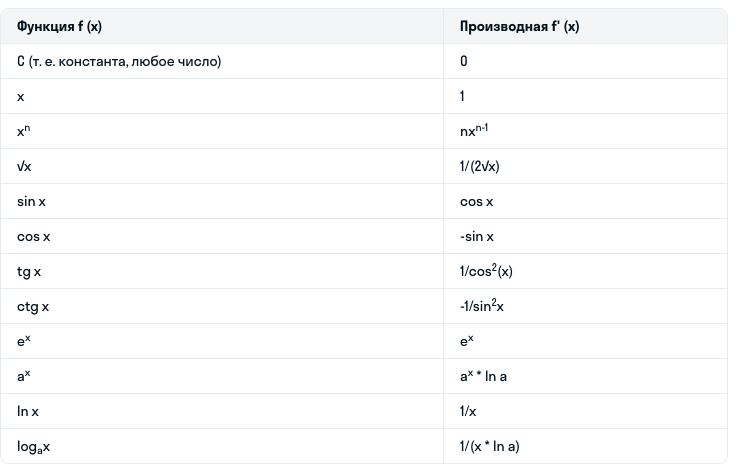

### Алгоритм нахождения наибольшего и наименьшего значения непрерывной функции на отрезке
Как определить наибольшее и наименьшее значения функции на отрезке?

        Найдём область определения данной функции и проверим, входит ли в неё заданный отрезок.

        Найдём производную данной функции.

        Приравняем производную к нулю и найдём точки, в которых она обращается в нуль (решим уравнение).

        Выберем из корней уравнения те точки, которые попадают в заданный промежуток, и вычислим значение функции в них.

        Возьмём точки начала и конца отрезка и найдём значение функции в них.

        Сделаем вывод о наибольшем и наименьшем значении функции. 

https://skysmart.ru/articles/mathematic/nahozhdeniya-naibolshego-i-naimenshego-znacheniya-funkcii

In [282]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + x*4              # здесь задаем функцию
yprime = y.diff(x)          # здесь вычисляем ее производную из библиотеки sympy
print(yprime)           

f_diff = lambdify(x, yprime, 'numpy')    # здесь задаем порядоек работы функции со значениями x + указываем вид последовательности
x_seq = np.array([-3,-2,-1,0,1,2,3,4])        # здесь задаем отрезок значений аргумента (например на отрезке [0,4])
print(f'Значения Х ..................{x_seq}')
#print(f'Значения функции на концах отрезка [{}, {}]')
print(f'Значения производной функции {f_diff(x_seq)}')    # здесь получаем массив значений производной функции на этом отрезке

for ind, x in enumerate(x_seq):
    if f_diff(x_seq)[ind] == 0: print('производная равна 0 при х = ', x)



2*x + 4
Значения Х ..................[-3 -2 -1  0  1  2  3  4]
Значения производной функции [-2  0  2  4  6  8 10 12]
производная равна 0 при х =  -2


In [280]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + x*4 

f_orig = lambdify(x, y, 'numpy')

f_orig(np.array([-1,5]))

array([-3, 45])

In [283]:
from sympy import *
import numpy as np
x = Symbol('x')
y = x**2 + x*4              # здесь задаем функцию
yprime = y.diff(x)          # здесь вычисляем ее производную из библиотеки sympy
print(yprime)

x=2
print(y)

2*x + 4
x**2 + 4*x


In [296]:
# поэлементное сложение списков
positive = [1, 2, 3, 4, 5]
negative = [-1, -2, -3]
combined = [1, 2, -3, 4]

result = map(lambda a, b, c: a + b + c, positive, negative, combined)

list(result)

[1, 2, -3]

In [304]:
# вывести все числа (тип int и float), находящиеся в данном списке, отбрасывая дробную часть у вещественных чисел. 
# Числа должны быть расположены в своем исходном порядке, каждое на отдельной строке.

data = ['Timur', -16.648911695768902, 'six', -202, 883.0093275936454, -765, (3, 4), -105.10718000213546, 976, -308.96857946288094, 458, ['one', 'two'], 479.92207220345927, -87, -71, 'twelve', 112, -621, -715.0179551194733, 'seven', 229, 729, -358, [1, 2, 3], -974, 882, -894.4709033242768, '', 323.7720806756133, 'beegeek', -224, 431, 170.6353248658936, -343.0016746052049, 'number', 104.17133679352878, [], -353.5964777099863, 'zero', -113, 288, None, -708.3036176571618]

new_data = [int(i) for i in data if type(i) in (int,float)]

print(*new_data, sep='\n')

-16
-202
883
-765
-105
976
-308
458
479
-87
-71
112
-621
-715
229
729
-358
-974
882
-894
323
-224
431
170
-343
104
-353
-113
288
-708


In [313]:
# Используя синтаксис анонимных функций, реализуйте рекурсивную функцию fib()

fibonacci(8) +3

24

        Функция print_operation_table()
        Реализуйте функцию print_operation_table(), которая принимает три аргумента в следующем порядке:

        operation — функция, характеризующая некоторую бинарную операцию
        rows — натуральное число
        cols — натуральное число
        Функция должна составлять и выводить таблицу из rows строк и cols столбцов, в которой элемент со строкой 
        �
        n и столбцом 
        �
        m имеет значение operation(n, m).

        Примечание 1. Нумерация строк и столбцов в таблице начинается с единицы.

        Примечание 2. Элементы в строках таблицы должны быть разделены одним пробелом, причем выравнивать таблицу необязательно.

        Примечание 3. Бинарная операция — математическая операция, принимающая два аргумента и возвращающая один результат.

In [319]:
def print_operation_table(operation, rows, cols):
    data = [[operation(row, col) for col in range(1,cols+1)] for row in range(1, rows+1)]

    def print_matrix(matrix, width):
        n=len(matrix)
        m=len(matrix[0])
        for r in range(n):
            for c in range(m):
                print(str(matrix[r][c]).ljust(width), end=' ')
            print()

    return print_matrix(data, 3)

print_operation_table(lambda a, b: a * b, 5, 5)

1   2   3   4   5   
2   4   6   8   10  
3   6   9   12  15  
4   8   12  16  20  
5   10  15  20  25  


In [320]:
print_operation_table(pow, 5, 4)

1   1   1   1   
2   4   8   16  
3   9   27  81  
4   16  64  256 
5   25  125 625 


In [316]:
rows, cols = 5, 5
operation = lambda a, b: a * b
data = [[operation(row, col) for col in range(1,cols+1)] for row in range(1, rows+1)]

def print_matrix(matrix, width):
    n=len(matrix)
    m=len(matrix[0])
    for r in range(n):
        for c in range(m):
            print(str(matrix[r][c]).ljust(width), end=' ')
        print()

print_matrix(data, 1)

1 2 3 4 5 
2 4 6 8 10 
3 6 9 12 15 
4 8 12 16 20 
5 10 15 20 25 


In [321]:
def print_operation_table(operation, rows, cols):
    data = [[operation(row, col) for col in range(1,cols+1)] for row in range(1, rows+1)]
    for r in range(rows):
        for c in range(cols):
            print(str(data[r][c]).ljust(3), end=' ')
        print()

print_operation_table(lambda a, b: a * b, 5, 5)

1   2   3   4   5   
2   4   6   8   10  
3   6   9   12  15  
4   8   12  16  20  
5   10  15  20  25  


        Функция verification()
        Реализуйте функцию verification(), которая проверяет правильность введенного пароля. Она должна принимать четыре аргумента в следующем порядке:

        login — логин пользователя
        password — пароль пользователя
        success — некоторая функция
        failure — некоторая функция
        Пароль считается правильным, если в нем присутствует, хотя бы одна заглавная латинская буква, хотя бы одна строчная латинская буква и хотя бы одна цифра. Функция verification() должна вызывать функцию success() с аргументом login, если переданный пароль является правильным, иначе — функцию failure() с аргументами login и строкой-сообщением об ошибке:

        в пароле нет ни одной буквы, если в пароле отсутствуют латинские буквы
        в пароле нет ни одной заглавной буквы, если в пароле отсутствуют заглавные латинские буквы
        в пароле нет ни одной строчной буквы, если в пароле отсутствуют строчные латинские буквы
        в пароле нет ни одной цифры, если в пароле отсутствуют цифры
        
        Примечание 1. Если пароль не удовлетворяет нескольким условиям, то приоритеты выбора строки-сообщения об ошибке являются следующими:

        в пароле нет ни одной буквы
        в пароле нет ни одной заглавной буквы
        в пароле нет ни одной строчной буквы
        в пароле нет ни одной цифры

In [335]:
def verification(login, password, success, failure):
    class LetterError1(Exception):
            pass

    class LetterError2(Exception):
        pass

    class LetterError3(Exception):
        pass

    class DigitError(Exception):
        pass

    def is_good_password(string):

        eng_letters = [chr(let) for let in range(ord('a'), ord('z')+1)]
        ENG_letters = [chr(let) for let in range(ord('A'), ord('Z')+1)]
        
        if not any([a in eng_letters+ENG_letters for a in string]):
            raise LetterError1('в пароле нет ни одной буквы')
        
        elif not any([a in ENG_letters for a in string]):
            raise LetterError2('в пароле нет ни одной заглавной буквы')
        
        elif not any([a in eng_letters for a in string]):
            raise LetterError3('в пароле нет ни одной строчной буквы')
        
        
        elif not any([a.isdigit() for a in string]):
            raise DigitError('в пароле нет ни одной цифры')
        
        else: return True

    try:
        if is_good_password(password): success(login)
    except (LetterError1,LetterError2,LetterError3, DigitError)  as err:
        text = err
        failure(login, text)
    
def success(login):
    print(f'Привет, {login}!')

def failure(login, text):
    print(f'{login}, попробуйте снова. Ошибка: {text}')

verification('timyrik20', 'Beegeek314', success, failure)
        


Привет, timyrik20!


In [336]:
def success(login):
    print(f'Здравствуйте, {login}!')

def failure(login, text):
    print(f'{login}, попробуйте снова. Текст ошибки: {text}')

verification('Ruslan_Chaniev', 'stepikstepik2', success, failure)

Ruslan_Chaniev, попробуйте снова. Текст ошибки: в пароле нет ни одной заглавной буквы


In [337]:
def success(login):
    print(f'Здравствуйте, {login}!')


def failure(login, text):
    print(f'{login}, попробуйте снова. Текст ошибки: {text}')


verification('Arthur_Davletov', 'мойпароль123', success, failure)

Arthur_Davletov, попробуйте снова. Текст ошибки: в пароле нет ни одной буквы


In [330]:
def is_good_password(string):
        class LetterError1(Exception):
            pass

        class LetterError2(Exception):
            pass

        class LetterError3(Exception):
            pass

        class DigitError(Exception):
            pass

        if not any([a.isalpha() for a in string]):
            raise LetterError1('в пароле нет ни одной буквы')
        
        elif not any([a.isupper() for a in string]):
            raise LetterError2('в пароле нет ни одной заглавной буквы')
        
        elif not any([a.islower() for a in string]):
            raise LetterError3('в пароле нет ни одной строчной буквы')
        
        
        elif not any([a.isdigit() for a in string]):
            raise DigitError('в пароле нет ни одной цифры')
        
        else: return True
        
        
        
is_good_password('aBBB')

DigitError: в пароле нет ни одной цифры

        Атрибуты __name__, __doc__, __defaults__
        Все функции содержат специальные атрибуты, которые содержат полезную информацию.

        Три важных атрибута:

        __name__ — имя функции
        __doc__ — строка документирования (строковый литерал, который расположен сразу за объявлением функции)
        __defaults__ — кортеж с аргументами по умолчанию

In [341]:
def func(name, language='Python', year=1992):
    pass

print(func.__name__)          # имя функции
print(func.__doc__)           # строка документирования
print(func.__defaults__)      # кортеж с аргументами по умолчанию

func
None
('Python', 1992)


In [342]:
print(abs.__doc__)
print(str.lower.__doc__)

Return the absolute value of the argument.
Return a copy of the string converted to lowercase.


In [343]:
# Для описания строки документации обычно используют тройные кавычки, в которых размещается соответствующая информация

def square(n):
    '''Принимает число и возвращает его квадрат.'''
    return n**2

def average(*args):
    '''Принимает несколько чисел и возвращает их среднее арифметическое значение.'''
    return sum(args)/len(args)

print(square.__doc__)
print(average.__doc__)

Принимает число и возвращает его квадрат.
Принимает несколько чисел и возвращает их среднее арифметическое значение.


Примечание 1. Переопределение (подмена) функций достаточно мощный механизм, однако и опасный. Никогда не стоит переопределять встроенные функции.

        Функция numbers_sum()
        Реализуйте функцию numbers_sum(), которая принимает один аргумент:

        elems — список произвольных объектов
        Функция должна возвращать сумму чисел (типы int и float), находящихся в списке elems, игнорируя все нечисловые объекты. Если в списке elems нет чисел, функция должна вернуть число 
        0
        0.

        Также функция должна иметь следующую строку документации:

        Принимает список и возвращает сумму его чисел (int, float),
        игнорируя нечисловые объекты. 0 - если в списке чисел нет

In [345]:
def numbers_sum(elems):
    """Принимает список и возвращает сумму его чисел (int, float),игнорируя нечисловые объекты. 0 - если в списке чисел нет."""
    return sum([elem for elem in elems if type(elem) in (int, float)])

print(numbers_sum([1, '2', 3, 4, 'five']))

8


        Новый print()
        Напишите программу, которая переопределяет встроенную функцию print() так, чтобы она печатала все переданные строковые аргументы в верхнем регистре.

        Примечание 1. Значения sep и end также должны переводиться в верхний регистр.

In [40]:
old_print = print
def do_smth(*args, sep=' ', end= ''):
    return old_print(*[arg.upper() if isinstance(arg,str) else arg for arg in args], sep=sep.upper(), end= end.upper())


prant = do_smth

words = ('black', 'white', 'grey', 'black-1', 'white-1', 'python')
prant(*words, sep=' to ', end=' LOVE')

BLACK TO WHITE TO GREY TO BLACK-1 TO WHITE-1 TO PYTHON LOVE

In [41]:
prant('bee', 'geek', sep=' and ', end=' wow')

BEE AND GEEK WOW

In [42]:
prant('beegeek', [1, 2, 3], 4)

BEEGEEK [1, 2, 3] 4

### Пользовательские атрибуты функций
У объектов функций есть дополнительный атрибут __dict__, являющийся словарем который используется для динамического наделения функций дополнительным функционалом. Устанавливать и получать значения из данного атрибута можно используя два синтаксиса:

        в стиле словаря: func.__dict__['attr'] = value
        через точечную нотацию: func.attr = value

Доступ к словарю атрибутов функции можно получить как из тела функции, так и из вне.

In [47]:
def greet():
    greet.age = 17

print(greet.__dict__)

greet.value = 777
greet.numbers = [1, 2, 3]
greet.name = 'Timur'


print(greet.__dict__)

greet()

print(greet.__dict__)

{}
{'value': 777, 'numbers': [1, 2, 3], 'name': 'Timur'}
{'value': 777, 'numbers': [1, 2, 3], 'name': 'Timur', 'age': 17}


Зачем? как вариант - для кэширования (мемоизации)

In [48]:
def fib(num):
    if num < 2:
        return num
    if num not in fib.__dict__:
        fib.__dict__[num] = fib(num - 1) + fib(num - 2)
    return fib.__dict__[num]

fib(40)

102334155

        Функция polynom()
        Реализуйте функцию polynom(), которая принимает один аргумент:

        x — вещественное число
        Функция должна возвращать значение выражения x**2 +1

        Также функция должна иметь атрибут values, представляющий собой множество (тип set) всех значений функции, которые уже были вычислены.

In [73]:

def polynom(x):
    res = x**2+1
    polynom.__dict__['values'].add(res)
    return res

polynom.values = set()

print(polynom(2))
print(polynom(5))
print(polynom(10))

print(polynom.values)

5
26
101
{26, 101, 5}


        Функция remove_marks()
        Реализуйте функцию remove_marks(), которая принимает два аргумента в следующем порядке:

        text — произвольная строка
        marks — набор символов
        Функция должна возвращать строку text, предварительно удалив из нее все символы, перечисленные в строке marks.

        Также функция remove_marks() должна иметь атрибут count, представляющий собой количество вызовов данной функции.

In [78]:
def remove_marks(text, marks):
    remove_marks.__dict__['count'] +=1
    return ''.join([elem for elem in text if elem not in marks])


remove_marks.count = 0

text = 'Hi! Will we go together?'

print(remove_marks(text, '!?'))
print(remove_marks.count)

Hi Will we go together
1


In [79]:
marks = '.,!?'
text = 'Are you listening? Meet my family! There are my parents, my brother and me.'

for mark in marks:
    print(remove_marks(text, mark))
    
print(remove_marks.count)

Are you listening? Meet my family! There are my parents, my brother and me
Are you listening? Meet my family! There are my parents my brother and me.
Are you listening? Meet my family There are my parents, my brother and me.
Are you listening Meet my family! There are my parents, my brother and me.
5


### Вложенный функции и замыкания

In [80]:
#пример работы вложенной функции

def get_speak_func(volume):
    def whisper(text):
        return text.lower() + '...'
    def yell(text):
        return text.upper() + '!'

    if volume > 0.5:
        return yell
    else:
        return whisper
    
whisper = get_speak_func(0.3)     # функция whisper()
yell = get_speak_func(0.7)        # функция yell()

print(whisper('Hello'))           # говорим шепотом
print(yell('Hello'))              # кричим

hello...
HELLO!


In [81]:
# пример работы функций-замыканий

def get_speak_func(text, volume):
    def whisper():                          # функция замыкания
        return text.lower() + '...'
    def yell():                             # функция замыкания
        return text.upper() + '!'
    
    if volume > 0.5:
        return yell
    else:
        return whisper

yell = get_speak_func('Hello, World', 0.7)

print(yell())

HELLO, WORLD!


Теперь вложенные функции whisper() и yell() не имеют параметра text. Они его получают и используют через родительскую функцию get_speak_func(). Функции, которые делают это, называются замыканиями. Замыкание запоминает значения из включающей его области, даже если поток программы больше не находится в этой области.

Таким образом, **замыкание — это особый вид функции.** 

    Она определена в теле другой функции и создаётся каждый раз во время её выполнения. Синтаксически это выглядит как функция, находящаяся целиком в теле другой функции. При этом вложенная функция содержит ссылки на локальные переменные внешней функции. Каждый раз при выполнении внешней функции происходит создание нового экземпляра внутренней функции, с новыми ссылками на переменные внешней функции.

##### Когда использовать замыкания

Концепция замыканий, то есть функций, захватывающих нелокальные переменные, находят много применений при написании кода. Замыкания хороши для:

        воздержания от жестко закодированных констант
        воздержания от использования глобальных переменных
        воздержания от создания ненужных типов данных (классов)
        замыкания нужны для реализации декораторов

Сокрытие данных основное преимущество замыканий.

In [84]:
def closure():
    count = 0
    def inner():
        nonlocal count
        count += 1
        print(count)
    return inner

start = closure()
another = closure()             # другое замыкание, со своими локальными значениями

start()                         # выводит 1
start()                         # выводит 2

another()                       # выводит 1

start()                         # выводит 3

another()

1
2
1
3
2


In [85]:
def greeting_creator(greeting_word):
    def greet(name):
        return f'{greeting_word}, {name}'

    return greet

say_hi = greeting_creator('Hi')         # сохраняем результат поведения от слова Привет
say_hello = greeting_creator('Hello')   # сохрянем результат поведения от слова Здравствуйте 

print(say_hi('Timur'))
print(say_hello('Soslan'))

Hi, Timur
Hello, Soslan


In [86]:
# линейная функция
def line_generator(k, b):
    def func(x):
        return k * x + b
    return func

line_func_1 = line_generator(2, 5)        # получаем функцию y = 2*x + 5
line_func_2 = line_generator(-6, 9)       # получаем функцию y = -6*x + 9

print(line_func_1(10))                    # печатаем значение 2*10 + 5
print(line_func_2(4))                     # печатаем значение -6*4 + 9

25
-15


### Нелокальные переменные
При поиске переменной с указанным именем приоритет (правило разрешения имен) следующий:

        сначала ищем локальную переменную
        если не нашли локальную, ищем нелокальную
        если не нашли нелокальную, ищем глобальную
        и в самом конце — встроенную в язык
Промежуточная область видимости, которая доступна вложенным функциям, называется нелокальной. Если вложенность функций больше двух уровней, нелокальная переменная ищет в «ближайшей» области видимости, т. е. в функции вложенностью на один меньше. Если не находит, поиск переходит в самую ближнюю из внешних областей видимости, затем в чуть более далекую — и так далее, пока не найдется нужное имя. Фактически интерпретатор ищет там, «где поближе».

### Nonlocal 

Если вложенная функция не просто обращается (получает значение) к переменной num, но и пытается его изменить! Внутренняя функция видит переменные в объемлющей функции, но, если она хочет такую переменную изменить, должна объявить ее **nonlocal**.

In [89]:
def outer_function():
    num = 5
    def inner_function():      # определяем вложенную функцию
        nonlocal num           # делаем переменную нелокальной 
        num += 10
        print(num)
    inner_function()           # вызываем вложенную функцию
    print(num)    
outer_function()

15
15


Атрибут __closure__

Все функции содержат специальный атрибут __closure__, который представляет из себя кортеж, содержащий данные, связанные с вложенными областями видимости, то есть с нелокальными переменными.



In [88]:
def outer_function(arg):
    num = 5
    name = 'Timur'
    numbers = [1, 2, 3]
    def inner_function():      # определяем вложенную функцию
        print(arg)
        print(num)
        print(numbers)
    return inner_function      # возвращаем вложенную функцию
        
inner = outer_function('python')

for var in inner.__closure__:
    print(var.cell_contents)

python
5
[1, 2, 3]


        Функция power()
        Реализуйте функцию power(), которая принимает один аргумент:

        degree — целое число
        Функция power() должна возвращать функцию, которая принимает в качестве аргумента целое число x и возвращает значение x в степени degree.

In [91]:
def power(degree):
    def result(x):
        return x**degree
    return result

square = power(2)
print(square(5))

print(power(2)(3))

25
9


        Функция generator_square_polynom() Квадратный трехчлен

        Рассмотрим семейство функций — квадратных трехчленов. Все эти функции имеют один и тот же вид:
        f(x)=ax2+bx+c

        Реализуйте функцию generator_square_polynom(), которая принимает три аргумента в следующем порядке:

        - a
        - b
        - с 

        Функция generator_square_polynom() должна возвращать функцию, которая принимает в качестве аргумента вещественное число x и возвращает значение выражения 

In [93]:
def generator_square_polynom(a,b,c):
    def result(x):
        return a*x**2 + b*x + c
    return result

f = generator_square_polynom(1, 2, 1)
print(f(5))

print(generator_square_polynom(9, 52, 64)(8))

36
1056


        Функция sourcetemplate()
        Строка запроса (query string) — часть URL адреса, содержащая ключи и их значения. Она начинается после вопросительного знака и идет до конца адреса. Например:

        https://beegeek.ru?name=timur     # строка запроса: name=timur
        Если параметров в строке запроса несколько, то они отделяются символом амперсанда &:

        https://beegeek.ru?name=timur&color=green     # строка запроса: name=timur&color=green 
        Реализуйте функцию sourcetemplate(), которая принимает один аргумент:

        url — URL адрес
        Функция sourcetemplate() должна возвращать функцию, которая принимает произвольное количество именованных аргументов и возвращает url адрес, объединенный со строкой запроса, сформированной из переданных аргументов. При вызове без аргументов она должна возвращать исходный url адрес без изменений.

In [102]:
def sourcetemplate(url):
    def make_query(**kwargs):
        res_url = url + ('','?')[any(kwargs)] + '&'.join([f'{k}={v}' for k,v in sorted(kwargs.items())])
        return res_url
    return make_query

url = 'https://beegeek.ru'
load = sourcetemplate(url)
print(load(name='timur'))

https://beegeek.ru?name=timur


In [101]:
url = 'https://stepik.org/lesson/651459/step/14'
load = sourcetemplate(url)
print(load(thread='solutions', unit=648165))

https://stepik.org/lesson/651459/step/14?thread=solutions&unit=648165


In [100]:
url = 'https://beegeek.ru'
load = sourcetemplate(url)
print(load())

https://beegeek.ru


In [98]:
any({1:2})

True

        Реализуйте функцию date_formatter(), которая принимает один аргумент:

        country_code — код страны
        Функция date_formatter() должна возвращать функцию, которая принимает в качестве аргумента дату (тип date) и возвращает строку с данной датой в формате страны с кодом country_code.

In [105]:
from datetime import date
def date_formatter(country_code):
    
    def res(some_date):
        d = {'ru': '%d.%m.%Y',
          'us': '%m-%d-%Y',
          'ca': '%Y-%m-%d',
          'br': '%d/%m/%Y',
          'fr': '%d.%m.%Y',
          'pt': '%d-%m-%Y'}
        
        return date.strftime(some_date, d[country_code])
    return res

date_ru = date_formatter('ru')
today = date(2022, 1, 25)
print(date_ru(today))

25.01.2022


In [106]:
date_ru = date_formatter('ca')
today = date(2015, 12, 7)
print(date_ru(today))

2015-12-07


        Функция sort_priority() 🌶️
        Реализуйте функцию sort_priority(), которая принимает два аргумента в следующем порядке:

        values — список чисел
        group — список, кортеж или множество чисел
        Функция должна сортировать по неубыванию список чисел values, делая при этом приоритетной группу чисел из group, которая должна следовать первой.

In [119]:
# сложная сортировка (есть аналогичная задача на сортировку строки)

def sort_priority(values, group):
    def comparator(elem):
        if elem in sorted(group):
            return (0, elem)
        else: return (1, elem)
    values.sort(key= comparator)
    return values
    

numbers = [8, 3, 1, 2, 5, 4, 7, 6]
group = {5, 7, 2, 3}
sort_priority(numbers, group)

print(numbers)

[2, 3, 5, 7, 1, 4, 6, 8]


In [120]:
# сложная сортировка намного проще:
# сразу возвращать кортеж (0, элемент) или (1 , элемент) если число не в списке

def sort_priority(numbers, group):
    numbers.sort(key=lambda x: (x not in group, x))

numbers = [8, 3, 1, 2, 5, 4, 7, 6]
group = {5, 7, 2, 3}
sort_priority(numbers, group)

print(numbers)

[2, 3, 5, 7, 1, 4, 6, 8]


In [118]:
lst = [1,5,3,-7,3,8,3,2]
lst.sort(key=abs)

lst

[1, 2, 3, 3, 3, 5, -7, 8]

### Аннотации типов 

https://stepik.org/lesson/655394/step/7?unit=652334

удобная вещь для более точного понимания кода и его наполнения

In [ ]:
# аннотации для коллекций и их содержимого в версии Python before 3.9

from typing import List, Tuple, Dict, Set

numbers: List[int]                                # тип всех элементов списка
person: Tuple[str, int, bool]                     # тип каждого элемента кортежа
prices: Dict[str, int]                            # тип ключей, тип значений
answers: Set[float]                               # тип всех элементов множества

In [ ]:
# аннотации для коллекций и их содержимого в версии Python after 3.9

numbers: list[int]                                # тип всех элементов списка
person: tuple[str, int, bool]                     # тип каждого элемента кортежа
prices: dict[str, int]                            # тип ключей, тип значений
answers: set[float]                               # тип всех элементов множества

**Атрибут __annotations__**

Доступ к использованным в функции аннотациям можно получить через атрибут __annotations__, в котором аннотации представлены в виде словаря, где ключами являются названия параметров, а значениями – их типы. При этом, возвращаемое функцией значение хранится в записи с ключом return

In [121]:
def print_hello(num1: int, num2: int, num3: int) -> float:
    return (num1 + num2 + num3) / 3

print(print_hello.__annotations__)

{'num1': <class 'int'>, 'num2': <class 'int'>, 'num3': <class 'int'>, 'return': <class 'float'>}


Удобные типы из блока typing 

- Union: для объединения типов Unoin[str, list, int]
    
        В Python 3.10 вместо записи Union[X, Y] можно писать X | Y

- Optional: Union[str, None] равнозначен Optional[str]

- Any: когда не знаешь, что функция получит на вход и на выход

- NoReturn указывает, что функция никогда не возвращает значение

In [122]:
from typing import NoReturn

def stop() -> NoReturn:
    raise RuntimeError('no way')

Аннотация к типу словаря: dict[str|int, tuple|list[int]]:

1) словарь, содержащий:
- ключ1 - строка, значение по ключу1 - целое число
- ключ2 - кортеж, значение по ключу - список целых чисел

### Задачи на Аннотацию типов

        Функция get_digits()
        Реализуйте функцию get_digits() c использованием аннотаций типов, которая принимает один аргумент:

        number — положительное целое или вещественное число
        Функция должна возвращать список, состоящий из цифр числа number.

In [123]:
def get_digits(number: int|float) -> list[int]:
    return [int(dig) for dig in list(str(number)) if dig.isdigit()]


print(get_digits(13.909934))

[1, 3, 9, 0, 9, 9, 3, 4]


        Функция top_grade()
        Реализуйте функцию top_grade() c использованием аннотаций типов, которая принимает один аргумент:

        grades — словарь, содержащий данные об ученике, а именно имя по ключу name и список оценок по ключу grades
        Функция должна возвращать словарь, содержащий имя ученика по ключу name и его самую высокую оценку по ключу top_grade.

In [133]:
def top_grade(grades: dict[str, str | list[int]]) -> dict[str, str | int]:
    flag = lambda x: isinstance(x,list)
    return {(k, 'top_grade')[flag(v)] :(v,max(v))[flag(v)] for k,v in grades.items()}

info = {'name': 'Timur', 'grades': [30, 57, 99]}

print(top_grade(info))

print(top_grade({'name': 'Ruslan', 'grades': [19, 48, 86, 45, 32]}))

annotations = top_grade.__annotations__

print(annotations['grades'])

{'name': 'Timur', 'top_grade': 99}
{'name': 'Ruslan', 'top_grade': 86}
dict[str, str | list[int]]


        Функция cyclic_shift()
        Реализуйте функцию cyclic_shift() с использованием аннотаций типов, которая принимает два аргумента в следующем порядке:

        numbers — список целых или вещественных чисел
        step — целое число
        Функция должна изменять переданный список, циклически сдвигая элементы списка на step шагов, и возвращать значение None. Если step является положительным числом, сдвиг происходит вправо, если отрицательным — влево.

In [185]:

def cyclic_shift(numbers: list[int|float], step: int) -> None:
    flag = step>0
    true_step = (-1*step, step)[flag]
    for i in range(true_step):
        elem = numbers[-1*flag]
        del numbers[-1*flag]
        if  flag: numbers.insert(flag-1,elem)
        else: numbers.append(elem)



# тесты 
numbers = [1, 2, 3, 4, 5]
cyclic_shift(numbers, 1)
print(numbers)

numbers = [1, 2, 3, 4, 5]
cyclic_shift(numbers, -2)
print(numbers)

annotations = cyclic_shift.__annotations__
print(annotations['return'])
print(annotations['step'])

numbers = [234, 33, 4, 6, 2, 4, 75, 34, 1, 3, 6, 3, 3]
cyclic_shift(numbers, 7)
print(numbers)

[5, 1, 2, 3, 4]
[3, 4, 5, 1, 2]
None
<class 'int'>
[75, 34, 1, 3, 6, 3, 3, 234, 33, 4, 6, 2, 4]


        Функция matrix_to_dict()
        Реализуйте функцию matrix_to_dict() с использованием аннотаций типов, которая принимает один аргумент:

        matrix — матрица произвольной размерности, элементами которой являются целые или вещественные числа
        Функция должна возвращать словарь, ключом в котором является номер строки матрицы, а значением — список элементов этой строки.

        Примечание 1. Используйте встроенные типы (list, tuple, ...), а не типы из модуля typing. Также используйте нотацию |, а не тип Union из модуля typing.

        Примечание 2. Под матрицей подразумеваются исключительно вложенные списки.

        Примечание 3. Нумерация строк матрицы в возвращаемом функцией словаре должна начинаться с единицы.

        Примечание 4. Элементы матрицы в списке должны располагаться в своем исходном порядке.

In [191]:
def matrix_to_dict(matrix: list[list[int | float]]) -> dict[int, list[int | float]]:
    return {ind: val for ind,val in enumerate(matrix, 1) }

matrix = [[5, 6, 7], [8, 3, 2], [4, 9, 8]]
print(matrix_to_dict(matrix))

matrix = [[5.1, 6, 7.94]]
print(matrix_to_dict(matrix))

print(*matrix_to_dict.__annotations__.values())

{1: [5, 6, 7], 2: [8, 3, 2], 3: [4, 9, 8]}
{1: [5.1, 6, 7.94]}
list[list[int | float]] dict[int, list[int | float]]


### Декораторы
https://stepik.org/lesson/640039/step/1?unit=636559

Декоратор — это функция, которая принимает другую функцию, расширяет ее поведение, не изменяя ее явно, и возвращает новую функцию.

In [192]:
def sample_decorator(func):          # определяем декоратор
    def wrapper():
        print('Начало функции')
        func()
        print('Конец функции')
    return wrapper

def say():
    print('Привет Мир!')

say = sample_decorator(say)          # декорируем функцию

say()                                # вызываем декорированную функцию

Начало функции
Привет Мир!
Конец функции


Способ, который декорирует функцию say(), — многословен, приходится набирать имя функции несколько раз. Кроме того, декорирование скрывается под определением функции. Вместо этого Python позволяет использовать декораторы более простым способом с помощью символа @.

In [194]:
def null_decorator(func):
    return func

@null_decorator                      # декорируем функцию
def say():
    print('Привет, Мир!')

say()

Привет, Мир!


In [196]:
# сопоставимость кода декорирования: 

"""def sample_decorator(func):          # определяем декоратор
    def wrapper():
        print('Начало функции')
        func()
        print('Конец функции')
    return wrapper

def say():
    print('Привет Мир!')

say = sample_decorator(say)          # декорируем функцию

say()                                # вызываем декорированную функцию"""

def sample_decorator(func):          # определяем декоратор
    def wrapper():
        print('Начало функции')
        func()
        print('Конец функции')
    return wrapper

# выражение @sample_decorator вызывает функцию sample_decorator() с say в качестве аргумента 
# и присваивает имени say возвращаемую функцию.
@sample_decorator                    # декорируем функцию
def say():
    print('Привет,Мир!')

say()

Начало функции
Привет,Мир!
Конец функции


Изменение поведения функции

Декоратор uppercase_decorator() сам по себе является функцией. Единственный способ повлиять на новое поведение функции, которую он декорирует, — это заменить исходную функцию замыканием. Вот почему декоратор uppercase_decorator() определяет и возвращает другую функцию wrapper(), которую затем можно вызвать позже, запустить исходную функцию и изменить ее результат.

In [197]:
def uppercase_decorator(func):
    def wrapper():
        original_result = func()
        modified_result = original_result.upper()
        return modified_result
    return wrapper              # используем замыкание

@uppercase_decorator
def greet():
    return 'Hello world!'

print(greet())

HELLO WORLD!


In [199]:
# применение нескольких декораторов: происходит снизу вверх 

def bold(func):
    def wrapper():
        return '<b>' + func() + '</b>'
    return wrapper

def italic(func):
    def wrapper():
        return '<i>' + func() + '</i>'
    return wrapper

@bold       # декорирует во вторую очередь
@italic     # декорирует в первую очередь
def greet():
    return 'Hello world!'

print(greet())

# раз очередность такая, то можно обойтись и без специального синтаксиса
def greet():
    return 'Hello world!'
greet = bold(italic(greet))
print(greet())

<b><i>Hello world!</i></b>
<b><i>Hello world!</i></b>


Декорирование функций, который принимают аргументы

In [200]:
# нужно явно указывать произвольный набор именованных и неименованных аргументов для функции-обертки

def bold(func):
    def wrapper(*args, **kwargs):
        return '<b>' + func(*args, **kwargs) + '</b>'
    return wrapper

@bold
def greet1(name):
    return f'Hello {name}!'

@bold
def greet2():
    return 'Hello world!'

@bold
def greet3(name, surname):
    return f'Hello {name} {surname}!'

print(greet1('Timur'))
print(greet2())
print(greet3('Timur', 'Guev'))

<b>Hello Timur!</b>
<b>Hello world!</b>
<b>Hello Timur Guev!</b>


In [201]:
def talk(func):
    def wrapper(*args, **kwargs):
        dash = '-' * 15
        result = func(*args, **kwargs)
        return dash + '\n' + result + '\n' + dash
    return wrapper

@talk
def greet(name):
    return f'Hello {name}!'

print(greet('Timur'))

---------------
Hello Timur!
---------------


In [203]:
# сложная сортировка: отсортировать последовательность чисел по возрастанию их лексикографического названия
number_names = {
        0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine',
        10: 'ten', 11: 'eleven', 12: 'twelve', 
        13: 'thirteen', 14: 'fourteen', 15: 'fifteen', 16: 'sixteen', 17: 'seventeen',  18: 'eighteen', 19: 'nineteen'}


print(*sorted(input().split(), key= lambda x: number_names[int(x)]))

8 5 1 1 13 3 2 0


Композиция функций

        Напишите функцию composition(f, g), которая принимает на вход две функции: f и g, -- и возвращает их композицию.

        Не вдаваясь в лишние сейчас детали,  назовём композицией f∘g двух заданных функций 
        функцию, для которой h(x)=f(g(x))

        Определите функцию композиции, предполагая, что аргументы у функции g могут быть какие угодно, и любое возвращаемое функцией g значение будет корректным аргументом для функции f.

In [210]:
def composition(f,g):
    def h(*x):
        return f(g(*x))
    return h
    
h = composition(lambda x: x**2, lambda x: x + 1)
print(h(5))   

h = composition(sum, lambda x, y, z: (x**2, y**3, z**4))
print(h(2, 3, 9))

36
6592


In [240]:
def sandwich(func):
    print('---- Верхний ломтик хлеба ----')
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print('---- Нижний ломтик хлеба ----')  
        return result  
    return wrapper

@sandwich
def add_ingredients(ingredients):
    print(' | '.join(ingredients))

add_ingredients(['томат', 'салат', 'сыр', 'бекон'])

---- Верхний ломтик хлеба ----
томат | салат | сыр | бекон
---- Нижний ломтик хлеба ----


In [241]:
@sandwich
def beegeek():
    return 'beegeek'
    
print(beegeek())

---- Верхний ломтик хлеба ----
---- Нижний ломтик хлеба ----
beegeek


        Новый print
        Напишите программу с использованием декоратора, которая переопределяет функцию print() так, чтобы она печатала весь текст в верхнем регистре.

        Формат входных данных
        На вход программе ничего не подается.

        Формат выходных данных
        Программа должна задекорировать функцию print() так, чтобы она печатала весь текст в верхнем регистре.

        Примечание 1. Значения sep и end также должны переводиться в верхний регистр.

In [248]:

def decorator(func):
    def wrapper(*args, **kwargs):
        ARGS = [str(arg).upper() for arg in args]
        KWARGS = {k:v.upper() for k,v in kwargs.items()}
        return func(*ARGS, **KWARGS)
    return wrapper

new_print = decorator(print)

new_print('hi', 'there', end='!')
print()
new_print(111, 222, 333, sep='xxx')


HI THERE!
111XXX222XXX333


        Декоратор do_twice
        Реализуйте декоратор do_twice, вызывающий декорируемую функцию два раза.

In [249]:
def do_twice(func):
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args, **kwargs)
    
    return wrapper

@do_twice
def beegeek():
    print('beegeek')
    
beegeek()

beegeek
beegeek


In [250]:
@do_twice
def beegeek():
    print('beegeek')
    
print(beegeek())

beegeek
beegeek
None


In [260]:
def do_twiced(func):
    return lambda *args, **kwargs: (func(*args, **kwargs), func(*args, **kwargs))[0]

@do_twiced
def beegeek():
    print('beegeek')   
beegeek()

print()

@do_twiced
def beegeek():
    print('beegeek') 
print(beegeek())

beegeek
beegeek

beegeek
beegeek
None


In [266]:
def do_thrice(func):
    return lambda *args, **kwargs: (func(*args, **kwargs), 
                                    func(*args, **kwargs),
                                    func(*args, **kwargs))[2]

@do_thrice
def beegeek():
    print('beegeek')

In [265]:
def do_three(func):
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)
        return func(*args, **kwargs)
    
    return wrapper

@do_three
def beegeek():
    print('beegeek')
beegeek()

beegeek
beegeek
beegeek


        Декоратор reverse_args
        Реализуйте декоратор reverse_args, который передает все позиционные аргументы в декорируемую функцию func в обратном порядке.

In [277]:
def reverse_args(func):
    def wrapper(*args, **kwargs):
        rev_args = args[::-1]
        return func(*rev_args, **kwargs)
    return wrapper

@reverse_args
def power(a, n):
    return a ** n
    
print(power(2, 3))

9


        Декоратор exception_decorator
        Реализуйте декоратор exception_decorator, который возвращает

        кортеж (value, 'Функция выполнилась без ошибок'), если декорируемая функция завершила свою работу без ошибок, где value — возвращаемое значение декорируемой функции
        кортеж (None, 'При вызове функции произошла ошибка'), если при выполнении декорируемой функции возникла ошибка

In [283]:
def exception_decorator(func):
    def wrapper(*args, **kwargs):
        try:
            value = func(*args, **kwargs)
            return (value, 'Функция выполнилась без ошибок')
        except: return (None, 'При вызове функции произошла ошибка')

    return wrapper

@exception_decorator
def f(x):
    return x**2 + 2*x + 1
print(f(7))

print() 

sum = exception_decorator(sum)
print(sum(['199', '1', 187]))

(64, 'Функция выполнилась без ошибок')

((None, 'При вызове функции произошла ошибка'), 'Функция выполнилась без ошибок')


        Декоратор takes_positive
        Реализуйте декоратор takes_positive, который проверяет, что все аргументы, передаваемые в декорируемую функцию, являются положительными целыми числами.

        Если хотя бы один аргумент не удовлетворяет данному условию, декоратор должен возбуждать исключение:

        TypeError, если аргумент не является целым числом
        ValueError, если аргумент является целым числом, но отрицательным или равным нулю
        Примечание 1. Приоритет возбуждения исключений при несоответствии аргумента обоим условиям или при наличии разных аргументов, несоответствующих разным условиям: TypeError, затем ValueError.

In [5]:
def takes_positive(func):
    def wrapper(*args, **kwargs):
        elems = list(args) + list(kwargs.values())
         
        if any([not isinstance(elem,int) for elem in elems]):
            raise TypeError
        elif any([elem<=0 for elem in elems]):
            raise ValueError

        elif all([elem>0 for elem in elems]):
            return func(*args, **kwargs) 

    return wrapper

@takes_positive
def positive_sum(*args):
    return sum(args)
    
print(positive_sum(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))      

55


In [6]:
@takes_positive
def positive_sum(*args):
    return sum(args)
    
try:
    print(positive_sum(-3, -2, -1, 0, 1, 2, 3))
except Exception as err:
    print(type(err))

<class 'ValueError'>


In [7]:
@takes_positive
def positive_sum(*args):
    return sum(args)
    
try:
    print(positive_sum('10', 20, 10))
except Exception as err:
    print(type(err))

<class 'TypeError'>


In [8]:
@takes_positive
def positive_sum(*args):
    return sum(args)
    
try:
    print(positive_sum(11, 20.7, 10))
except Exception as err:
    print(type(err))

<class 'TypeError'>


Атрибуты функций после применения декоратора могут измениться

In [9]:
def bold(func):
    def wrapper(*args, **kwargs):
        return '<b>' + func(*args, **kwargs) + '</b>'
    return wrapper

@bold
def greet(name):
    '''Функция приветствия пользователя.'''
    return f'Hello {name}!'

print(greet.__name__)
print(greet.__doc__)

wrapper
None


Атрибуты имени и строки документирования изменились!

In [10]:
# решение проблемы с сохранением имени функции и строки документирования

def bold(func):
    def wrapper(*args, **kwargs):
        return '<b>' + func(*args, **kwargs) + '</b>'
    # просто сообщим имени декоратора имя и строку документирования декорируемой функции 
    wrapper.__name__ = func.__name__
    wrapper.__doc__ = func.__doc__
    return wrapper

@bold
def greet(name):
    '''Функция приветствия пользователя.'''
    return f'Hello {name}!'

print(greet.__name__)
print(greet.__doc__)

greet
Функция приветствия пользователя.


СПОСОБ ЛУЧШЕ: 

Для решения проблемы перетирания данных атрибутов на практике используют другой декоратор, который находится в модуле functools и называется wraps. Таким образом, чтобы предотвратить перетирание атрибутов __name__ и __doc__ декорируемой функции, декораторы должны использовать декоратор functools.wraps, который сохраняет информацию о первоначальной функции.

In [11]:
import functools

def bold(func):
    @functools.wraps(func)                              # сразу декорируем ДЕКОРАТОР, чтобы он сохранил атрибуты
    def wrapper(*args, **kwargs):
        return '<b>' + func(*args, **kwargs) + '</b>'
    return wrapper

@bold
def greet(name):
    '''Функция приветствие пользователя.'''
    return f'Hello {name}!'

print(greet.__name__)
print(greet.__doc__)

greet
Функция приветствие пользователя.


### ОБЩИЙ ШАБЛОН ДЕКОРАТОРА

In [12]:
import functools

def decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        # Что-то выполняется до вызова декорируемой функции
        value = func(*args, **kwargs)
        # декорируется возвращаемое значение функции
        # или что-то выполняется после вызова декорируемой функции
        return value
    return wrapper

In [13]:
# декоратор вычисления времени работы функции
# декоратор времени работы

import functools, time

def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        val = func(*args, **kwargs)
        end = time.perf_counter()
        work_time = end - start
        print(f'Время выполнения {func.__name__}: {round(work_time, 4)} сек.')
        return val
    return wrapper

@timer
def test(n):
    return sum([(i/99)**2 for i in range(n)])

@timer
def sleep(n):
    time.sleep(n)

res1 = test(10000)
res2 = sleep(4)

print(f'Результат функции test = {res1}')
print(f'Результат функции sleep = {res2}')

Время выполнения test: 0.0042 сек.
Время выполнения sleep: 4.0029 сек.
Результат функции test = 34005033.67003357
Результат функции sleep = None


In [14]:
# Декоратор отслеживания количества вызовов функции

import functools

def counter(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        wrapper.num += 1
        print(f'Вызов {func.__name__}: {wrapper.num}')
        val = func(*args, **kwargs)
        return val
    wrapper.num = 0
    return wrapper

@counter
def greet(name):
    return f'Hello {name}!'

print(greet('Timur'))
print(greet('Ruslan'))
print(greet('Arthur'))
print(greet('Gvido'))

Вызов greet: 1
Hello Timur!
Вызов greet: 2
Hello Ruslan!
Вызов greet: 3
Hello Arthur!
Вызов greet: 4
Hello Gvido!


In [15]:
# Декоратор замедления времени выполнения функции (на 1 секунду)

import functools
import time

def slow_down(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        time.sleep(1)
        return func(*args, **kwargs)
    return wrapper

@slow_down
def countdown(number):
    if number < 1:
        print('Конец!')
    else:
        print(number)
        countdown(number - 1)
        
countdown(5)

5
4
3
2
1
Конец!


In [16]:
# красивый вывод заданного текста

import sys, time
def teleprint(*args, delay=0.05, str_join=' '):
    text = str_join.join(str(x) for x in args)
    n = len(text)
    for i, char in enumerate(text, 1):
        if i == n:
            char = f'{char}\n'
        print(char, end='')
        time.sleep(delay)
        
teleprint('Привет Python!', 'Меня зовут Тимур', 'Beegeek = <3', str_join='*')
teleprint('Привет Python!', 'Меня зовут Тимур', 'Beegeek = <3', str_join='*')

Привет Python!*Меня зовут Тимур*Beegeek = <3
Привет Python!*Меня зовут Тимур*Beegeek = <3


In [17]:
import sys, time
def teleprint(*args, delay=0.05, str_join=' '):
    text = str_join.join(str(x) for x in args)
    for i in text:
        print(i, end='')
        time.sleep(delay)
    print()
        
teleprint('Привет Python!', 'Меня зовут Тимур', 'Beegeek = <3', str_join='*')
teleprint('Привет Python!', 'Меня зовут Тимур', 'Beegeek = <3', str_join='*')

Привет Python!*Меня зовут Тимур*Beegeek = <3
Привет Python!*Меня зовут Тимур*Beegeek = <3


        Декоратор returns_string
        Реализуйте декоратор returns_string, который проверяет, что возвращаемое значение декорируемой функции принадлежит типу str. Если возвращаемое значение принадлежит какому-либо другому типу, декоратор должен возбуждать исключение TypeError.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [18]:
from functools import wraps

def returns_string(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        if isinstance(result,str):
            return result
        else: raise TypeError
    return wrapper

@returns_string
def beegeek():
    return 'beegeek'
    
print(beegeek())

beegeek


In [19]:
@returns_string
def add(a, b):
    return a + b

try:
    print(add(3, 7))
except TypeError as e:
    print(type(e))

<class 'TypeError'>


        Декоратор trace
        Реализуйте декоратор trace, который выводит отладочную информацию о декорируемой функции во время ее выполнения, а именно: имя функции, переданные аргументы и возвращаемое значение в следующем формате:

        TRACE: вызов <имя функции>() с аргументами: <кортеж позиционных аргументов>, <словарь именованных аргументов>
        TRACE: возвращаемое значение <имя функции>(): <возвращаемое значение>
        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [37]:
from functools import wraps

def trace(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        #if isinstance(result, str): result = f"'{result}'"
        print(f'TRACE: вызов {func.__name__}() с аргументами: {args}, {kwargs}')
        print(f'''TRACE: возвращаемое значение {func.__name__}(): {(result, f"'{result}'")[isinstance(result, str)]}''')
        return result
    return wrapper

@trace
def say(name, line):
    return f'{name}: {line}'
    
say('Jane', 'Hello, World')

TRACE: вызов say() с аргументами: ('Jane', 'Hello, World'), {}
TRACE: возвращаемое значение say(): 'Jane: Hello, World'


'Jane: Hello, World'

In [38]:
@trace
def sub(a, b, c):
    '''прекрасная функция'''
    return a - b + c
    
print(sub.__name__)
print(sub.__doc__)
sub(20, 5, c=10)

sub
прекрасная функция
TRACE: вызов sub() с аргументами: (20, 5), {'c': 10}
TRACE: возвращаемое значение sub(): 25


25

In [39]:
@trace
def beegeek():
    '''beegeek docs'''
    return 'beegeek'

print(beegeek())    
print(beegeek.__name__)
print(beegeek.__doc__)

TRACE: вызов beegeek() с аргументами: (), {}
TRACE: возвращаемое значение beegeek(): 'beegeek'
beegeek
beegeek
beegeek docs


### Декораторы с аргументами

In [40]:
def print_symbols(symbol, length):          # не декоратор, потому что принимает на вход вовсе не функцию
    def decorator(func):                    # декоратор, потому что принимает и возвращает функцию
        def wrapper(*args, **kwargs):
            print(symbol * length)
            return func(*args, **kwargs)
        return wrapper
    return decorator

@print_symbols('*', 30)
def add(a, b):
    return a + b

@print_symbols('-', 10)
def mult(a, b):
    return a * b

@print_symbols('=', 40)
def diff(a, b):
    return a - b

print(add(3, 9))
print(mult(10, 20))
print(diff(100, 1))

******************************
12
----------
200
99


Декоратор delayed, который создает требуемую задержку выполнения кода. Такое поведение иногда требуется для мониторинга доступности какого-нибудь ресурса.

In [41]:
import functools
import time

def delayed(delay=2):                           # не является декоратором, но мы ее так называем для удобства
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            print(f'Спим {delay} сек.')
            time.sleep(delay)
            value = func(*args, **kwargs)
            return value
        return wrapper
    return decorator

@delayed(1)
def countdown(number):
    if number < 1:
        print('Конец!')
    else:
        print(number)
        countdown(number - 1)
        
countdown(5)

Спим 1 сек.
5
Спим 1 сек.
4
Спим 1 сек.
3
Спим 1 сек.
2
Спим 1 сек.
1
Спим 1 сек.
Конец!


декоратор timer, который подсчитывает время выполнения функции. Для более точного подсчета декоратор принимает аргумент iters, который задает количество измерений.

In [43]:
import functools, time

def timer(iters=1):
    def decorator(func):   
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            total = 0
            for i in range(iters):
                start = time.perf_counter()
                value = func(*args, **kwargs)
                end = time.perf_counter()
                total += end - start
            print(f'Среднее время выполнения {func.__name__}: {round(total/iters, 4)} сек.')
            return value
        return wrapper
    return decorator

@timer(iters=1000)
def test(n):
    return sum([(i/99)**2 for i in range(n)])

@timer(iters=3)
def sleep(n):
    time.sleep(n)

res1 = test(10000)
res2 = sleep(4)

print(f'Результат функции test = {res1}')
print(f'Результат функции sleep = {res2}')

Среднее время выполнения test: 0.002 сек.
Среднее время выполнения sleep: 4.0019 сек.
Результат функции test = 34005033.67003357
Результат функции sleep = None


Декоратор, который вызывает функцию заданное количество раз

In [45]:
import functools, time

def repeater(repeat=1):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            for i in range(1, repeat + 1):
                print(f'{i}-й запуск функции.')
                value = func(*args, **kwargs)
                time.sleep(1)
            return value
        return wrapper
    return decorator

@repeater(repeat=5)
def beegeek():
    print('beegeek')

beegeek()

1-й запуск функции.
beegeek
2-й запуск функции.
beegeek
3-й запуск функции.
beegeek
4-й запуск функции.
beegeek
5-й запуск функции.
beegeek


к одной функции можно применять несколько декораторов. При использовании этой возможности каждый декоратор должен указываться на отдельной строке. 

Несколько декораторов, следующих подряд, **не декорируют друг друга**. Они изменяют функцию и ее измененный вариант в качестве аргумента передают друг другу в порядке следования.

In [46]:
import functools
import time

def repeater(repeat=1):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            for i in range(1, repeat + 1):
                print(f'{i}-й запуск функции.')
                value = func(*args, **kwargs)
            return value
        return wrapper
    return decorator

def delayed(delay=2):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            print(f'Спим {delay} сек.')
            time.sleep(delay)
            value = func(*args, **kwargs)
            return value
        return wrapper
    return decorator

Оцени разное поведение в двух вариантах следования:

In [47]:
@repeater(repeat=5)
@delayed(delay=1)
def monitor(url):
    print(f'Проверка {url} на доступность.')
    
monitor('https://stepik.org/')

1-й запуск функции.
Спим 1 сек.
Проверка https://stepik.org/ на доступность.
2-й запуск функции.
Спим 1 сек.
Проверка https://stepik.org/ на доступность.
3-й запуск функции.
Спим 1 сек.
Проверка https://stepik.org/ на доступность.
4-й запуск функции.
Спим 1 сек.
Проверка https://stepik.org/ на доступность.
5-й запуск функции.
Спим 1 сек.
Проверка https://stepik.org/ на доступность.


In [48]:
@delayed(delay=1)
@repeater(repeat=5)
def monitor(url):
    print(f'Проверка {url} на доступность.')
    
monitor('https://stepik.org/')

Спим 1 сек.
1-й запуск функции.
Проверка https://stepik.org/ на доступность.
2-й запуск функции.
Проверка https://stepik.org/ на доступность.
3-й запуск функции.
Проверка https://stepik.org/ на доступность.
4-й запуск функции.
Проверка https://stepik.org/ на доступность.
5-й запуск функции.
Проверка https://stepik.org/ на доступность.


        Декоратор prefix
        Реализуйте декоратор prefix, который принимает два аргумента в следующем порядке:

        string — произвольная строка
        to_the_end — булево значение, по умолчанию равное False
        Декоратор должен добавлять строку string к возвращаемому значению декорируемой функции. Если to_the_end имеет значение True, строка string добавляется в конец, если False — в начало.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [49]:
from functools import wraps
def prefix(string, to_the_end= False):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            return (string, '')[to_the_end] + func(*args, **kwargs) + ('', string)[to_the_end] 
        return wrapper
    return decorator

@prefix('€')
def get_bonus():
    return '2000'
    
print(get_bonus())

€2000


In [50]:
@prefix('$$$', to_the_end=True)
def get_bonus():
    return '2000'
       
print(get_bonus())

2000$$$


        Декоратор make_html
        Тег — элемент языка разметки, используемый для форматирования текста. Например, текст, заключённый между начальным тегом <small> и конечным тегом </small>, отображается с меньшим размером, чем основной текст, а текст между тегами <big> и </big> отображается с большим размером.

        Реализуйте декоратор make_html(), который принимает один аргумент:

        tag — HTML-тег, например, del
        Декоратор должен обрамлять возвращаемое значение декорируемой функции в HTML-тег tag.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [51]:
from functools import wraps
def make_html(tag):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            return f'<{tag}>' + func(*args, **kwargs) + f'</{tag}>'
        return wrapper
    return decorator

@make_html('i')
@make_html('del')
def get_text(text):
    return text
    
print(get_text(text='decorators are so cool!'))

<i><del>decorators are so cool!</del></i>


        Декоратор repeat
        Реализуйте декоратор repeat, который принимает один аргумент:

        times — натуральное число
        Декоратор должен вызывать декорируемую функцию times раз.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [52]:
from functools import wraps
def repeat(times):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            for i in range(times):
                result = func(*args, **kwargs)
            return  result
        return wrapper
    return decorator

@repeat(3)
def say_beegeek():
    '''documentation'''
    print('beegeek')
    
say_beegeek()

beegeek
beegeek
beegeek


        Декоратор strip_range
        Реализуйте декоратор strip_range, который принимает три аргумента в следующем порядке:

        start — неотрицательное целое число
        end — неотрицательное целое число
        char — одиночный символ, по умолчанию равный точке .
        Декоратор должен изменять возвращаемое значение декорируемой функции, заменяя все символы в диапазоне индексов от start (включительно) до end (не включительно) на символ char.

In [55]:
from functools import wraps
def strip_range(start, end, char='.'):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            res_lst = list(func(*args, **kwargs))
            result =  ''.join([(elem,char)[ind in range(start,end)]\
                                for ind, elem in enumerate(res_lst)])
            return  result
        return wrapper
    return decorator

@strip_range(3, 5)
def beegeek():
    return 'beegeek'
    
print(beegeek())

bee..ek


In [56]:
@strip_range(3, 20, '_')
def beegeek():
    return 'beegeek'
    
print(beegeek())

bee____


In [57]:
@strip_range(20, 30)
def beegeek():
    return 'beegeek'
    
print(beegeek())

beegeek


        Декоратор returns
        Реализуйте декоратор returns, который принимает один аргумент:

        datatype — тип данных
        Декоратор должен проверять, что возвращаемое значение декорируемой функции принадлежит типу datatype. Если возвращаемое значение принадлежит какому-либо другому типу, декоратор должен возбуждать исключение TypeError.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [58]:
from functools import wraps
def returns(datatype):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            res = func(*args, **kwargs)
            if not isinstance(res, datatype):
                raise TypeError
            return  res
        return wrapper
    return decorator

@returns(int)
def add(a, b):
    return a + b

print(add(10, 5))

15


In [59]:
@returns(int)
def add(a, b):
    return a + b

try:
    print(add('199', '1'))
except TypeError as e:
    print(type(e))

<class 'TypeError'>


In [60]:
@returns(list)
def beegeek():
    '''beegeek docs'''
    return 'beegeek'

print(beegeek.__name__)
print(beegeek.__doc__)

try:
    print(beegeek())
except TypeError as e:
    print(type(e))

beegeek
beegeek docs
<class 'TypeError'>


        Декоратор takes
        Реализуйте декоратор takes, который принимает произвольное количество позиционных аргументов, каждый из которых является типом данных.

        Декоратор должен проверять, что аргументы, передаваемые в декорируемую функцию, принадлежат одному из этих типов. Если хотя бы один аргумент не принадлежит одному из данных типов, декоратор должен возбуждать исключение TypeError.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [69]:
from functools import wraps
def takes(*datatypes):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            all_args = list(args) + list(kwargs.values())
            if not all([(type(arg) in datatypes) for arg in all_args]):
                raise TypeError
            return  func(*args, **kwargs)
        return wrapper
    return decorator

@takes(int, str)
def repeat_string(string, times):
    return string * times

print(repeat_string('bee', 3))

beebeebee


In [70]:
@takes(list, bool, float, int)
def repeat_string(string, times):
    return string * times

try:
    print(repeat_string('bee', 4))
except TypeError as e:
    print(type(e))

<class 'TypeError'>


        Декоратор add_attrs
        Реализуйте декоратор add_attrs, который принимает произвольное количество именованных аргументов и устанавливает их в качестве атрибутов декорируемой функции. Названием атрибута должно являться имя аргумента, значением атрибута — значение аргумента.

        Также декоратор должен сохранять имя и строку документации декорируемой функции.

In [88]:
from functools import wraps
def add_attrs(**attributes):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            return  func(*args, **kwargs)
        wrapper.__dict__.update(attributes)
        return wrapper
    return decorator

@add_attrs(attr1='bee', attr2='geek')
def beegeek():
    return 'beegeek'
    
print(beegeek.attr1)
print(beegeek.attr2)

bee
geek


In [89]:
@add_attrs(attr2='geek')
@add_attrs(attr1='bee')
def beegeek():
    return 'beegeek'
    
print(beegeek.attr1)
print(beegeek.attr2)
print(beegeek.__name__)

bee
geek
beegeek


        Декоратор ignore_exception
        Реализуйте декоратор ignore_exception, который принимает произвольное количество позиционных аргументов — типов исключений, и выводит текст:

        Исключение <тип исключения> обработано
        если во время выполнения декорируемой функции было возбуждено исключение, принадлежащее одному из переданных типов.

        Если возбужденное исключение не принадлежит ни одному из переданных типов, оно должно быть возбуждено снова.

In [5]:
from functools import wraps
def ignore_exception(*exceptions):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            try:
                result = func(*args, **kwargs)
                return result
            
            except Exception as err:
                if err.__class__ in exceptions: 
                    print(f'Исключение {err.__class__.__name__} обработано')
                else: raise err

           
        return wrapper
    return decorator

@ignore_exception(ZeroDivisionError, TypeError, ValueError)
def f(x):
    return 1 / x
    
f(0)

Исключение ZeroDivisionError обработано


In [6]:
min = ignore_exception(ZeroDivisionError)(min)

try:
    print(min(1, '2', 3, [4, 5]))
except Exception as e:
    print(type(e))

<class 'TypeError'>


        Декоратор retry
        Реализуйте декоратор retry, который принимает один аргумент:

        times — натуральное число
        Декоратор должен выполнять повторную попытку вызова декорируемой функции, если во время ее выполнения возникает ошибка. Декоратор должен вызывать ее до тех пор, пока не исчерпает количество попыток times, после чего должен возбуждать исключение MaxRetriesException.

In [22]:
from functools import wraps
class MaxRetriesException(Exception):
    pass
def retry(times):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            try:
                for i in range(times-1):
                        try:
                            result = func(*args, **kwargs)
                            return result
                        
                        except Exception as err:
                            print(f'{i+1} попытка')
                            continue
                print(f'{times} попытка')
                result = func(*args, **kwargs)
                return result
            except Exception as err:
                raise    MaxRetriesException             
             
        return wrapper
    return decorator

@retry(3)
def no_way():
    raise ValueError
   
try:
    no_way()
except Exception as e:
    print(type(e))

1 попытка
2 попытка
3 попытка
<class '__main__.MaxRetriesException'>


In [23]:
@retry(8)
def beegeek():
    beegeek.calls = beegeek.__dict__.get('calls', 0) + 1
    if beegeek.calls < 5:
        raise ValueError
    print('beegeek')
    
beegeek()

1 попытка
2 попытка
3 попытка
4 попытка
beegeek


In [24]:
@retry(6)
def beegeek():
    beegeek.calls = beegeek.__dict__.get('calls', 0) + 1
    if beegeek.calls < 7:
        raise ValueError
    print('beegeek')

try:
    beegeek()
except Exception as e:
    print(type(e))

1 попытка
2 попытка
3 попытка
4 попытка
5 попытка
6 попытка
<class '__main__.MaxRetriesException'>


### Модуль functools
https://stepik.org/lesson/751476/step/1?unit=753330

функция частичного применения partial()

Частичное применение позволяет на основе старой функции создать новую, которая "частично применена".

        Сигнатура функции следующая: partial(func, *args, **kwargs). 

Данная функция возвращает специальный partial объект, который при вызове вызывается как функция func, в которую дополнительно передаются позиционные аргументы args и именованные аргументы kwargs.

In [1]:
from functools import partial

def multiply(a, b):
    return a * b

double = partial(multiply, 2)    # вместо первого аргумента функции multiply будет использован аргумент, переданный partial
triple = partial(multiply, 3)

print(double(5))        # 2 * 5
print(triple(10))       # 3 * 10

10
30


In [3]:
from functools import partial

def multiply(a, b):
    return a * b

double = partial(multiply, b=2)
print(double(5))

10


Фактически, мы фискируем аргумент исходной функции, который будем использовать

In [2]:
from functools import partial

basetwo = partial(int, base=2)

print(basetwo('101'))
print(basetwo('1000'))
print(basetwo('11111'))

5
8
31


Атрибуты функции partial

In [4]:
from functools import partial

def pretty_print(text, symbol, count):
    print(symbol * count)
    print(text)
    print(symbol * count)

star_pretty_print = partial(pretty_print, 'Hi!!!', symbol='*')

star_pretty_print(count=7)

print(star_pretty_print.args)       # возвращает кортеж позиционных аргументов
print(star_pretty_print.keywords)   # возвращает словарь именованных аргументов

star_pretty_print.func('Исходная функция', symbol='~', count=20)    # возвращает исходную функцию (до применения partial)

*******
Hi!!!
*******
('Hi!!!',)
{'symbol': '*'}
~~~~~~~~~~~~~~~~~~~~
Исходная функция
~~~~~~~~~~~~~~~~~~~~


Если нужны атрибуты строки документирования функции и/или ее имя - нужно использовать update_wrapper

update_wrapper() из модуля functools можно скопировать и добавить атрибуты __name__ и __doc__ из исходной функции в partial объект.

In [5]:
from functools import partial, update_wrapper

def multiply(a, b):
    '''Функция перемножает два числа и возвращает вычисленное значение.'''
    return a * b

double = partial(multiply, 2)

update_wrapper(double, multiply)   # копируем информацию из функции multiply в partial объект double

print(double.__name__)
print(double.__doc__)

multiply
Функция перемножает два числа и возвращает вычисленное значение.


In [1]:
import functools, time 

# декоратор подсчета времени работы функции
def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        val = func(*args, **kwargs)
        end = time.perf_counter()
        work_time = end - start
        print(f'Время выполнения {func.__name__}: {round(work_time, 4)} сек.')
        return val
    return wrapper

@timer
def ways_rec(n):
    """ рекурсивная функция, которая считает количество вариантов попасть на n ступеньку , 
    имея возможность шагать на 1, 3 и 4 ступеньки за раз"""
    cache = {0:1, 1:1, 2:1, 3:1, 4:2}
    def temp(n):
        result = cache.get(n)
        if result is None:
            result = temp(n-1) + temp(n-3) + temp(n-4)
            cache[n] = result
        return result
    return temp(n)

@timer
def ways_din(n):
    """ функция динамического программирования, которая считает количество вариантов попасть на n ступеньку , 
    имея возможность шагать на 1, 3 и 4 ступеньки за раз """
    dp = [0] * (n+1)
    dp[0] = dp[1] = dp[2] =dp[3] = 1
    dp[4] = 2
    for i in range(5, n+1):
        dp[i] = dp[i-1] + dp[i-3] + dp[i-4]
    return dp[n]


print(ways_rec(500))

print()

print(ways_din(500))

Время выполнения ways_rec: 0.0028 сек.
100887593057066418230392292155377327989230367617830561023371358463025154196882692957626260961048402217375

Время выполнения ways_din: 0.0004 сек.
100887593057066418230392292155377327989230367617830561023371358463025154196882692957626260961048402217375
